In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Admission_Data.csv')

In [7]:
df.head()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.describe()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
correlation_matrix = df.corr()

In [7]:
correlation_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


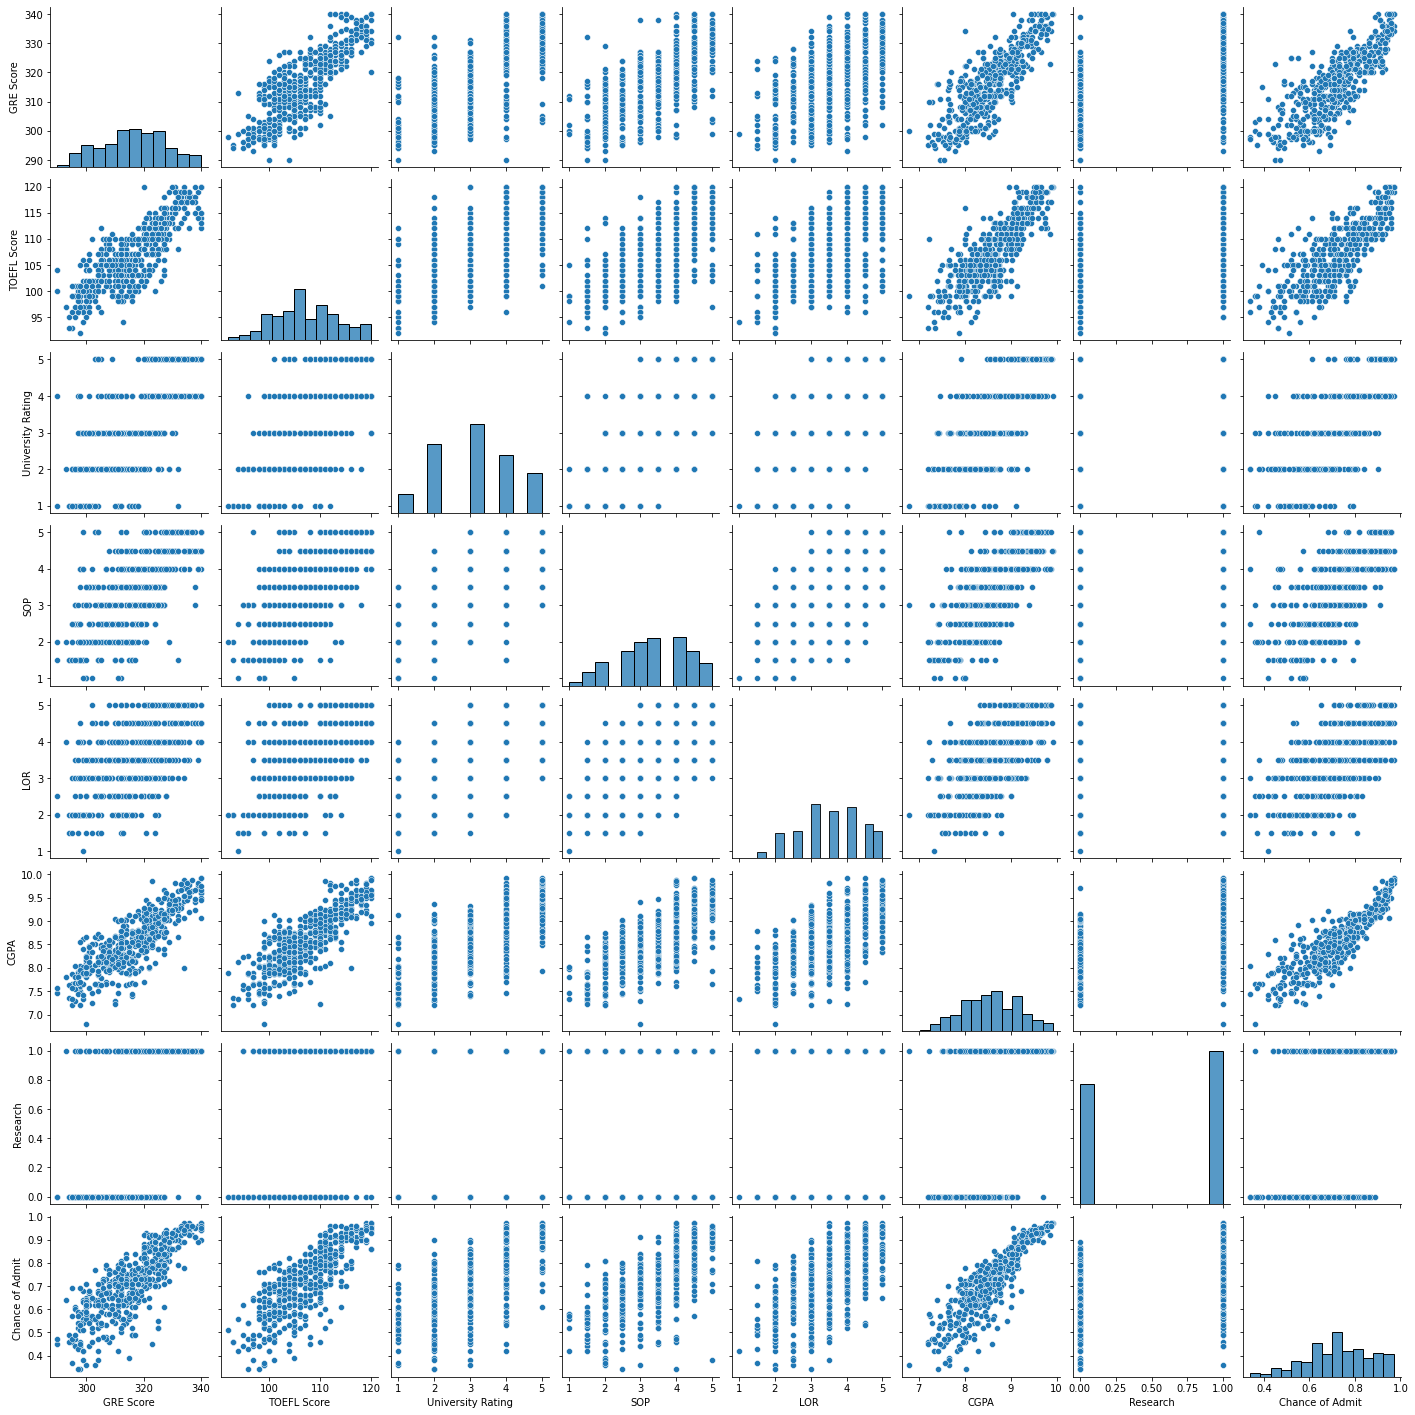

In [8]:
sns.pairplot(df)

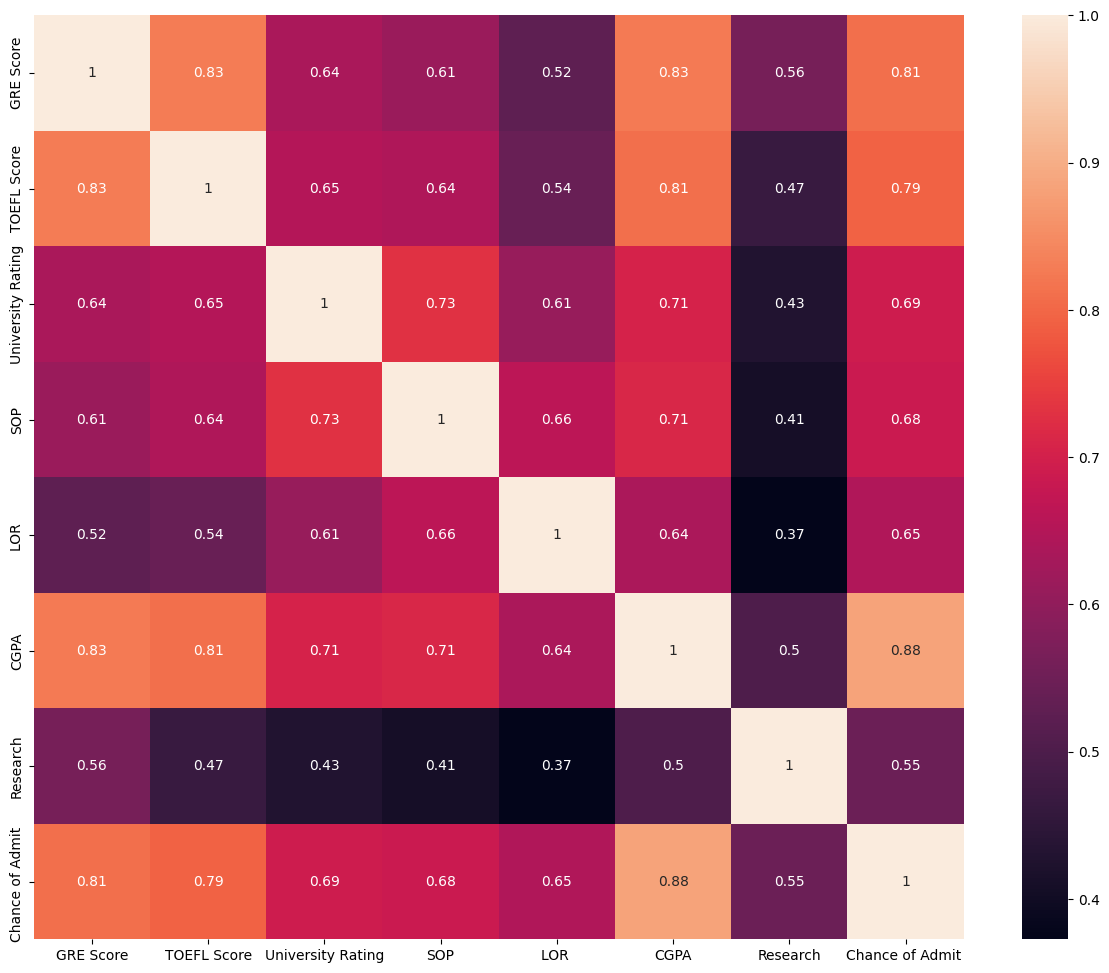

In [9]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [10]:
X, y = df.drop(['Chance of Admit'], axis=1), df['Chance of Admit']

x_tr_scaler = MinMaxScaler()
x_ts_scaler = MinMaxScaler()
y_tr_scaler = MinMaxScaler()
y_ts_scaler = MinMaxScaler()


X = np.array(X)
y = np.array(y).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train_scaled = x_tr_scaler.fit_transform(x_train)
x_test_scaled = x_ts_scaler.fit_transform(x_test)
y_train_scaled = y_tr_scaler.fit_transform(y_train)
y_test_scaled = y_ts_scaler.fit_transform(y_test)

y_train_scaled = y_train_scaled.reshape((y_train.shape[0],))
y_test_scaled = y_test_scaled.reshape((y_test.shape[0],))

In [11]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [46]:
input = Input(shape=x_train.shape[1])
Dense1 = Dense(32, activation='relu')(input)
# Dense2 = Dense(16, activation='relu')(Dense1)
# Dense3 = Dense(8, activation='relu')(Dense1)
output = Dense(1)(Dense1)
model = Model(inputs=input, outputs=output)

In [48]:
best_model_filepath = 'best_model.h5'
best_model = ModelCheckpoint(best_model_filepath,
                            monitor='val_loss',
                            mode='min',
                            verbose=1,
                            save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss',
                        patience=35,
                        verbose=2,
                        restore_best_weights=True)

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_3 (Dense)             (None, 32)                256       
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [49]:
EPOCHS = 200
history = model.fit(x_train_scaled,
                    y_train_scaled,
                    shuffle=True,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    callbacks=[best_model],
                    verbose='auto')

Epoch 1/200
 1/12 [=>............................] - ETA: 5s - loss: 0.3714 - mse: 0.3714
Epoch 1: val_loss improved from inf to 0.12982, saving model to best_model.h5
12/12 [==============================] - 1s 42ms/step - loss: 0.2827 - mse: 0.2827 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 2/200
 1/12 [=>............................] - ETA: 0s - loss: 0.1120 - mse: 0.1120
Epoch 2: val_loss improved from 0.12982 to 0.04323, saving model to best_model.h5
12/12 [==============================] - 0s 25ms/step - loss: 0.0788 - mse: 0.0788 - val_loss: 0.0432 - val_mse: 0.0432
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0616 - mse: 0.0616
Epoch 3: val_loss improved from 0.04323 to 0.04194, saving model to best_model.h5
12/12 [==============================] - 0s 44ms/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 4/200
 9/12 [=====================>........] - ETA: 0s - loss: 0.0385 - mse: 0.0385
Epoch 4: val_loss improved from 0.0419

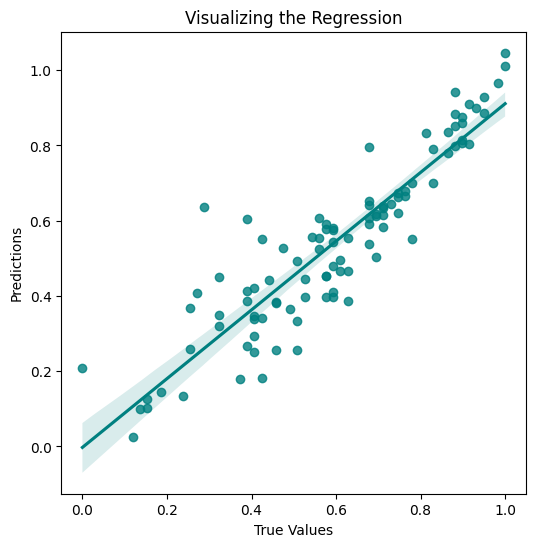

In [50]:
test_predictions = model.predict(x_test_scaled)


plt.figure(figsize= (6, 6))
plt.title('Visualizing the Regression')
sns.regplot(x=y_test_scaled, y=test_predictions, color = 'teal')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [51]:
tf.keras.backend.clear_session()

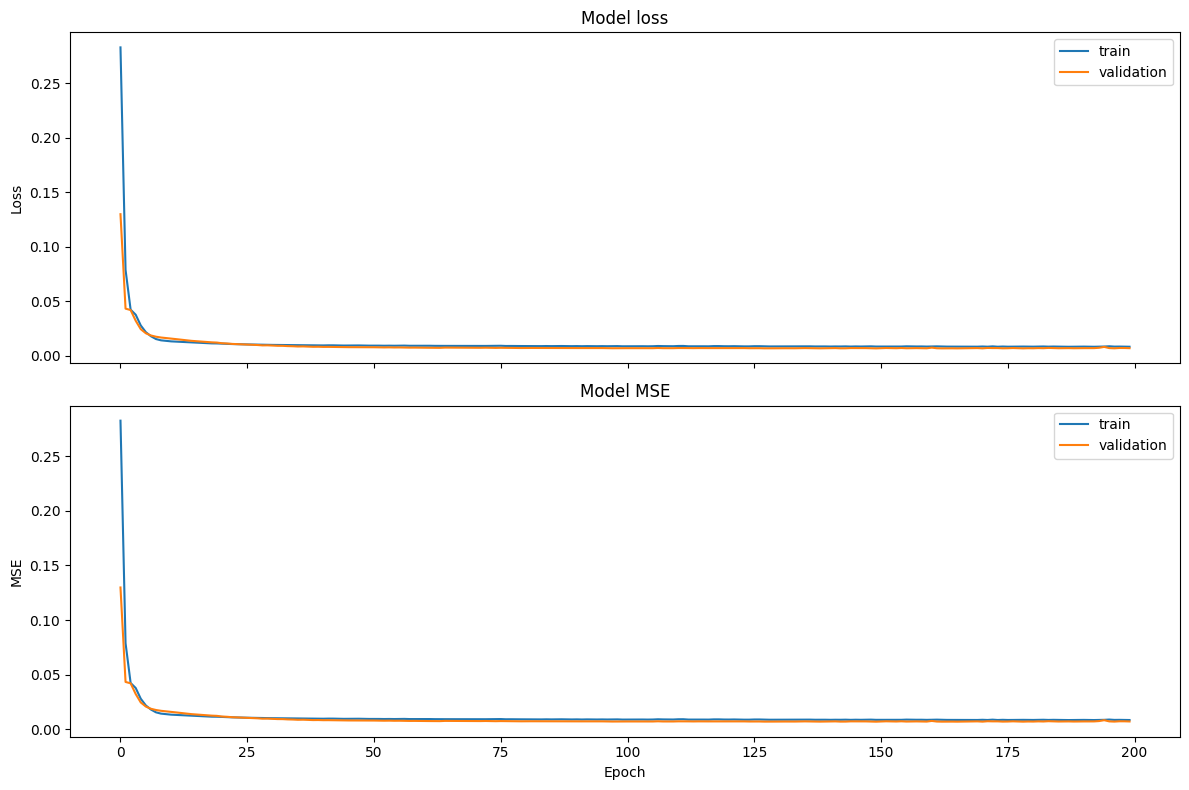

In [52]:
figure, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(36, 24))

df_loss_mse_mae = pd.DataFrame(history.history)
df_loss = df_loss_mse_mae[['loss','val_loss']].copy(deep=True)
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_mse = df_loss_mse_mae[['mse','val_mse']].copy(deep=True)
df_mse.rename(columns={'mse':'train','val_mse':'validation'},inplace=True)
# df_mae = df_loss_mse_mae[['mae','val_mae']].copy(deep=True)
# df_mae.rename(columns={'mae':'train','val_mae':'validation'},inplace=True)

df_loss.plot(ax=ax1, title='Model loss', figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_mse.plot(ax=ax2, title='Model MSE',figsize=(12,8)).set(xlabel='Epoch',ylabel='MSE')
# df_mae.plot(ax=ax3, title='Model MAE',figsize=(12,8)).set(xlabel='Epoch',ylabel='MAE')

figure.tight_layout()

In [53]:
from sklearn.metrics import r2_score
print('The R2 square value of NN is :', r2_score(y_test_scaled, test_predictions)*100)

The R2 square value of NN is : 75.70565450789361


In [137]:
# model_json = model.to_json()
# with open('model.json', 'w') as json_file:
#     json_file.write(model_json)
# model.save_weights('model_weights.h5')

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [55]:
randomforest_regressor = RandomForestRegressor()
linreg = LinearRegression()

randomforest_regressor.fit(x_train_scaled, y_train_scaled)
linreg.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [56]:
rf_ypred = randomforest_regressor.predict(x_test_scaled)
print('The R2 square value of RandomForest is :', r2_score(y_test_scaled, rf_ypred)*100)

lin_ypred = linreg.predict(x_test_scaled)
print('The R2 square value of Naive Bayes is :', r2_score(y_test_scaled, lin_ypred)*100)

The R2 square value of RandomForest is : 64.20082196609256
The R2 square value of Naive Bayes is : 72.64936590806545


In [58]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {'degree':range(1, 21)}

svr_grid = GridSearchCV(SVR(), params)
svr_grid.fit(x_train_scaled, y_train.reshape((y_train.shape[0],)))
svr_grid.score(x_test_scaled, y_test.reshape((y_test.shape[0],)))

0.42863079986138386

In [57]:
y_test.shape

(100, 1)